In [183]:
#Checking location of data in Kaggle
# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

/kaggle/input/telecom-churn/telecom_churn_data.csv


## Telecom Churn Case Study
The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively.  

 
The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months.

---

In [184]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#To print max columns and max rows
pd.set_option("display.max_columns", 250)
pd.set_option("display.max_rows", 250)

## Import Data

In [185]:
## For Local System Import

raw_data = pd.read_csv("telecom_churn_data.csv")

## For Kaggle
# raw_data = pd.read_csv("/kaggle/input/telecom-churn/telecom_churn_data.csv")

## For Google Drive
# from google.colab import drive
# drive.mount('/content/drive')
#raw_data = pd.read_csv('/content/drive/My Drive/Data/telecom_churn_data.csv')

In [186]:
raw_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [187]:
raw_data.shape

(99999, 226)

### Import Data Dictionary

In [188]:
# data_dict = pd.read_excel("Data+Dictionary-+Telecom+Churn+Case+Study.xlsx", sheet_name="Sheet1")
# print(data_dict.shape)
# data_dict

# Data Cleaning

In [189]:
#printing all columns names
raw_data_columns= raw_data.columns.tolist()
raw_data_columns

['mobile_number',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 's

<mark> Last four columns names are looking in different format
    `aug_vbc_3g`,`jul_vbc_3g`, `jun_vbc_3g`, `sep_vbc_3g` <br>
    The column names are here not in numeric format like 3, 6, 8, 9 so we should rename these columns

In [190]:
raw_data.rename(columns = {'jun_vbc_3g':'vbc_3g_6', 'jul_vbc_3g':'vbc_3g_7', 'aug_vbc_3g':'vbc_3g_8',
                              'sep_vbc_3g':'vbc_3g_9'}, inplace = True)

### General Data Checks- Unique Key, Redundant data
**Checking unique key and variables with single unique value with zero missing**

In [191]:
#The no of unique mobile numbers, this is an id column
raw_data['mobile_number'].nunique()==raw_data.shape[0]

True

<mark>Mobile number is a unique key</mark>

Now lets check other variables if they have same value throughout the datafrmae or not

In [192]:
list_column_check=['circle_id','last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9']

for col in list_column_check:
    print('# of missing values are '+str(raw_data[[col]].isnull().sum())+ ' and # of unique values are '+str(raw_data[[col]].nunique()))

# of missing values are circle_id    0
dtype: int64 and # of unique values are circle_id    1
dtype: int64
# of missing values are last_date_of_month_6    0
dtype: int64 and # of unique values are last_date_of_month_6    1
dtype: int64
# of missing values are last_date_of_month_7    601
dtype: int64 and # of unique values are last_date_of_month_7    1
dtype: int64
# of missing values are last_date_of_month_8    1100
dtype: int64 and # of unique values are last_date_of_month_8    1
dtype: int64
# of missing values are last_date_of_month_9    1659
dtype: int64 and # of unique values are last_date_of_month_9    1
dtype: int64


<mark> We should drop all columns with zero missing and only one unique value <br>
Lets Drop the `mobile_number` and `circle_id`  and `last_date_of_month_6`    

In [193]:
raw_data.drop(['mobile_number', 'circle_id','last_date_of_month_6','last_date_of_month_7',
             'last_date_of_month_8','last_date_of_month_9'], axis=1, inplace=True)

In [194]:
raw_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 220 columns):
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float64
roam_og_mou_6               float64
roam_og_mou_7               float64
roam_og_mou_8               float64
roam_og_mou_9               float64
loc_og_t2t_mou_6            float64
loc_og_t2t_mou_7          

In [195]:
raw_data.describe(include='all')

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9
count,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.00

In [196]:
# look at missing value ratio in each column
round(100*(raw_data.isnull().sum()/len(raw_data.index)), 2)

loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou_6             3.94
loc_og_t2t_mou_7             3.86
loc_og_t2t_mou_8             5.38
loc_og_t2t_mou_9             7.75
loc_og_t2m_mou_6             3.94
loc_og_t2m_mou_7             3.86
loc_og_t2m_mou

In [197]:
mean_zero=[[raw_data.mean()==0]]
mean_zero

[[loc_og_t2o_mou         True
  std_og_t2o_mou         True
  loc_ic_t2o_mou         True
  arpu_6                False
  arpu_7                False
  arpu_8                False
  arpu_9                False
  onnet_mou_6           False
  onnet_mou_7           False
  onnet_mou_8           False
  onnet_mou_9           False
  offnet_mou_6          False
  offnet_mou_7          False
  offnet_mou_8          False
  offnet_mou_9          False
  roam_ic_mou_6         False
  roam_ic_mou_7         False
  roam_ic_mou_8         False
  roam_ic_mou_9         False
  roam_og_mou_6         False
  roam_og_mou_7         False
  roam_og_mou_8         False
  roam_og_mou_9         False
  loc_og_t2t_mou_6      False
  loc_og_t2t_mou_7      False
  loc_og_t2t_mou_8      False
  loc_og_t2t_mou_9      False
  loc_og_t2m_mou_6      False
  loc_og_t2m_mou_7      False
  loc_og_t2m_mou_8      False
  loc_og_t2m_mou_9      False
  loc_og_t2f_mou_6      False
  loc_og_t2f_mou_7      False
  loc_og_t

As seen above few of the columns have mean value as zero lets check unique value and null values for these to understand if these are uselessL

In [198]:
list_column_mean_zero=['loc_og_t2o_mou',
'std_og_t2o_mou',
'loc_ic_t2o_mou',
'std_og_t2c_mou_6',
'std_og_t2c_mou_7',
'std_og_t2c_mou_8',
'std_og_t2c_mou_9',
'std_ic_t2o_mou_6',
'std_ic_t2o_mou_7',
'std_ic_t2o_mou_8',
'std_ic_t2o_mou_9']

for col in list_column_mean_zero:
    print('# of missing values are '+str(raw_data[[col]].isnull().sum())+ ' and # of unique values are '+str(raw_data[[col]].nunique()))

# of missing values are loc_og_t2o_mou    1018
dtype: int64 and # of unique values are loc_og_t2o_mou    1
dtype: int64
# of missing values are std_og_t2o_mou    1018
dtype: int64 and # of unique values are std_og_t2o_mou    1
dtype: int64
# of missing values are loc_ic_t2o_mou    1018
dtype: int64 and # of unique values are loc_ic_t2o_mou    1
dtype: int64
# of missing values are std_og_t2c_mou_6    3937
dtype: int64 and # of unique values are std_og_t2c_mou_6    1
dtype: int64
# of missing values are std_og_t2c_mou_7    3859
dtype: int64 and # of unique values are std_og_t2c_mou_7    1
dtype: int64
# of missing values are std_og_t2c_mou_8    5378
dtype: int64 and # of unique values are std_og_t2c_mou_8    1
dtype: int64
# of missing values are std_og_t2c_mou_9    7745
dtype: int64 and # of unique values are std_og_t2c_mou_9    1
dtype: int64
# of missing values are std_ic_t2o_mou_6    3937
dtype: int64 and # of unique values are std_ic_t2o_mou_6    1
dtype: int64
# of missing values 

<mark>'loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_og_t2c_mou_9','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8','std_ic_t2o_mou_9'.<mark>

**These columns had only 0 and nan values.so,we can drop these columns**

In [199]:
raw_data=raw_data.drop(list_column_mean_zero,axis=1)

**Lets flag date variables and categorical variables**

In [200]:
cat_vars =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'night_pck_user_9',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8',
             'fb_user_9']

date_vars = ['date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_9',
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8',
             'date_of_last_rech_data_9']

num_vars = [x for x in raw_data.columns if x not in cat_vars + date_vars]

print('Total var count is '+str(raw_data.shape[1]))

print("cat_vars count is: " + str(len(cat_vars)))
print("date_vars count is: " + str(len(date_vars)))
print("num_vars count is: " + str(len(num_vars)))

Total var count is 209
cat_vars count is: 8
date_vars count is: 8
num_vars count is: 193


In [201]:
# Making a copy of data where we can make changes
data=raw_data.copy()

### Missing Value Treatment
1. Delete: Delete the missing values 
2. Impute: 
    - Imputing by a simple statistic: Replace the missing values by another value, commonly the mean, median, mode etc. 
    - Predictive techniques: Use statistical models such as k-NN, SVM etc. to predict and impute missing values

#### Categorical data cleaning

In [202]:
# For categorical column missing values can be imputed with '-99' 
# where -99 can be treated as a new category.
# categorical_vars = ["night_pck_user_6", "night_pck_user_7", "night_pck_user_8", 
# "night_pck_user_9", "fb_user_6", "fb_user_7", "fb_user_8", "fb_user_9"]
for var in cat_vars:
    data[var].fillna(value=-99, inplace=True)

In [203]:
#Create dummy variables for all the six categorial variables
night_pck_user_6_d = pd.get_dummies(data['night_pck_user_6'],prefix="night6",drop_first=True)
night_pck_user_7_d = pd.get_dummies(raw_data['night_pck_user_7'],prefix="night7",drop_first=True)
night_pck_user_8_d = pd.get_dummies(raw_data['night_pck_user_8'],prefix="night8",drop_first=True)

fb_user_6_d = pd.get_dummies(data['fb_user_6'],prefix="fb6", drop_first=True)
fb_user_7_d = pd.get_dummies(data['fb_user_7'],prefix="fb7",drop_first=True)
fb_user_8_d = pd.get_dummies(data['fb_user_8'],prefix="fb8",drop_first=True)

data = pd.concat([data,night_pck_user_6_d],axis=1)
data = pd.concat([data,night_pck_user_7_d],axis=1)
data = pd.concat([data,night_pck_user_8_d],axis=1)

data = pd.concat([data,fb_user_6_d],axis=1)
data = pd.concat([data,fb_user_7_d],axis=1)
data = pd.concat([data,fb_user_8_d],axis=1)

# drop all categorial columns
data = data.drop(cat_vars, 1)

In [204]:
round(100*(data.isnull().sum()/len(data)))

arpu_6                       0.0
arpu_7                       0.0
arpu_8                       0.0
arpu_9                       0.0
onnet_mou_6                  4.0
onnet_mou_7                  4.0
onnet_mou_8                  5.0
onnet_mou_9                  8.0
offnet_mou_6                 4.0
offnet_mou_7                 4.0
offnet_mou_8                 5.0
offnet_mou_9                 8.0
roam_ic_mou_6                4.0
roam_ic_mou_7                4.0
roam_ic_mou_8                5.0
roam_ic_mou_9                8.0
roam_og_mou_6                4.0
roam_og_mou_7                4.0
roam_og_mou_8                5.0
roam_og_mou_9                8.0
loc_og_t2t_mou_6             4.0
loc_og_t2t_mou_7             4.0
loc_og_t2t_mou_8             5.0
loc_og_t2t_mou_9             8.0
loc_og_t2m_mou_6             4.0
loc_og_t2m_mou_7             4.0
loc_og_t2m_mou_8             5.0
loc_og_t2m_mou_9             8.0
loc_og_t2f_mou_6             4.0
loc_og_t2f_mou_7             4.0
loc_og_t2f

#### Continuous Data Cleaning

In [205]:
# Columns with more than 70% missing values
colmns_missing_data = round(100*(data.isnull().sum()/len(data)), 2)
colmns_missing_data[colmns_missing_data >= 70]

date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_8    73.66
date_of_last_rech_data_9    74.08
total_rech_data_6           74.85
total_rech_data_7           74.43
total_rech_data_8           73.66
total_rech_data_9           74.08
max_rech_data_6             74.85
max_rech_data_7             74.43
max_rech_data_8             73.66
max_rech_data_9             74.08
count_rech_2g_6             74.85
count_rech_2g_7             74.43
count_rech_2g_8             73.66
count_rech_2g_9             74.08
count_rech_3g_6             74.85
count_rech_3g_7             74.43
count_rech_3g_8             73.66
count_rech_3g_9             74.08
av_rech_amt_data_6          74.85
av_rech_amt_data_7          74.43
av_rech_amt_data_8          73.66
av_rech_amt_data_9          74.08
arpu_3g_6                   74.85
arpu_3g_7                   74.43
arpu_3g_8                   73.66
arpu_3g_9                   74.08
arpu_2g_6                   74.85
arpu_2g_7     

In [206]:
#lets look at important columns
print(data.total_rech_data_6.describe())
print("---------------------------------------")
print(data.total_rech_data_7.describe())
print("---------------------------------------")

print(data.av_rech_amt_data_6.describe())
print("---------------------------------------")

print(data.av_rech_amt_data_7.describe())
print("---------------------------------------")

count    25153.000000
mean         2.463802
std          2.789128
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max         61.000000
Name: total_rech_data_6, dtype: float64
---------------------------------------
count    25571.000000
mean         2.666419
std          3.031593
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max         54.000000
Name: total_rech_data_7, dtype: float64
---------------------------------------
count    25153.000000
mean       192.600982
std        192.646318
min          1.000000
25%         82.000000
50%        154.000000
75%        252.000000
max       7546.000000
Name: av_rech_amt_data_6, dtype: float64
---------------------------------------
count    25571.000000
mean       200.981292
std        196.791224
min          0.500000
25%         92.000000
50%        154.000000
75%        252.000000
max       4365.000000
Name: av_rech_amt_data_7, dtype: float64
--------------

(array([9.6820e+03, 1.1236e+04, 2.5380e+03, 1.1930e+03, 3.5300e+02,
        2.4200e+02, 1.3600e+02, 3.4000e+01, 4.0000e+01, 2.7000e+01,
        3.1000e+01, 1.2000e+01, 1.1000e+01, 1.1000e+01, 5.0000e+00,
        6.0000e+00, 4.0000e+00, 3.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 4.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([5.00000000e-01, 1.45983333e+02, 2.91466667e+02, 4.36950000e+02,
        5.82433333e+02, 7.27916667e+02, 8.73400000e+02, 1.01888333e+03,
        1.16436667e+03, 1.30985000e+03, 1.45533333e+03, 1.60081667e+03,
        1.74630000e+03, 1.89178333e+03, 2.03726667e+03, 2.18275000e+03,
        2.32823333e+03, 2.47371667e+03, 2.61920000e+03, 2.76468333e+03,
        2.91016667e+03, 3.05565000e+03, 3.20113333e+03, 3.34661667e+03,
        3.49210000e+03, 3.63758333e+03, 3.78306667e+03, 3.92855000e+03,
        4.07403333e+03, 4.21951667e+03, 4.36500000e+03]),
 <a list of 30 Patch objects

<Figure size 432x288 with 0 Axes>

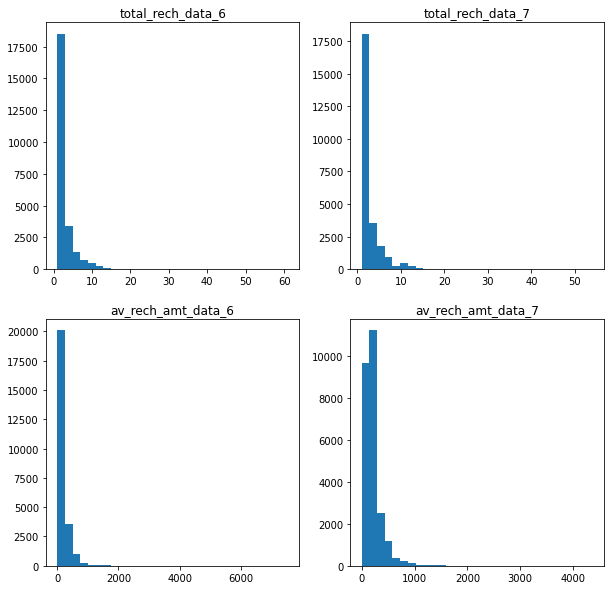

In [207]:

plt.figure(1)
fig, ax = plt.subplots(figsize=(10,10))
plt.subplot(2,2,1)
plt.title("total_rech_data_6")
plt.hist(data.total_rech_data_6.dropna(),bins=30)


plt.subplot(2,2,2)
plt.title("total_rech_data_7")
plt.hist(data.total_rech_data_7.dropna(),bins=30)

plt.subplot(2,2,3)
plt.title("av_rech_amt_data_6")
plt.hist(data.av_rech_amt_data_6.dropna(),bins=30)

plt.subplot(2,2,4)
plt.title("av_rech_amt_data_7")
plt.hist(data.av_rech_amt_data_7.dropna(),bins=30)

- The minimum value is 1, and not zero, 
- missing -- indicating that no recharge was done in this month. 
- Thus, missing values can be imputed with 0.

In [208]:
data.total_rech_data_6.fillna(value=0, inplace=True)
data.total_rech_data_7.fillna(value=0, inplace=True)
data.total_rech_data_8.fillna(value=0, inplace=True)
data.total_rech_data_9.fillna(value=0, inplace=True)

data.av_rech_amt_data_6.fillna(value=0, inplace=True)
data.av_rech_amt_data_7.fillna(value=0, inplace=True)
data.av_rech_amt_data_8.fillna(value=0, inplace=True)
data.av_rech_amt_data_9.fillna(value=0, inplace=True)

In [209]:
# Columns with more than 70% missing values
colmns_missing_data = round(100*(data.isnull().sum()/len(data)), 2)
print(colmns_missing_data[colmns_missing_data >= 70])

date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_8    73.66
date_of_last_rech_data_9    74.08
max_rech_data_6             74.85
max_rech_data_7             74.43
max_rech_data_8             73.66
max_rech_data_9             74.08
count_rech_2g_6             74.85
count_rech_2g_7             74.43
count_rech_2g_8             73.66
count_rech_2g_9             74.08
count_rech_3g_6             74.85
count_rech_3g_7             74.43
count_rech_3g_8             73.66
count_rech_3g_9             74.08
arpu_3g_6                   74.85
arpu_3g_7                   74.43
arpu_3g_8                   73.66
arpu_3g_9                   74.08
arpu_2g_6                   74.85
arpu_2g_7                   74.43
arpu_2g_8                   73.66
arpu_2g_9                   74.08
dtype: float64


In [210]:
drop_missing_values_columns = colmns_missing_data[colmns_missing_data > 70].index
data.drop(drop_missing_values_columns, axis=1, inplace=True)

In [211]:
print('Number of columns droped here  = ', len(drop_missing_values_columns))
print('Dataframe Shape: ', data.shape)

Number of columns droped here  =  24
Dataframe Shape:  (99999, 187)


#### Lets drop all remaining date columns now

In [212]:
data.drop(['date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_9'], axis=1, inplace=True)

In [213]:
print('Dataframe Shape: ', data.shape)

Dataframe Shape:  (99999, 183)


### 1. Derive new features

This is one of the most important parts of data preparation since good features are often the differentiators between good and bad models. Use your business understanding to derive features you think could be important indicators of churn.

In [214]:
# New DERIVED Columns for Total Data Recharge Amount
data["total_rech_data_amt_6"] = data["total_rech_data_6"]*data['av_rech_amt_data_6']
data["total_rech_data_amt_7"] = data["total_rech_data_7"]*data['av_rech_amt_data_7']
data["total_rech_data_amt_8"] = data["total_rech_data_8"]*data['av_rech_amt_data_8']
data["total_rech_data_amt_9"] = data["total_rech_data_9"]*data['av_rech_amt_data_9']

Derive More Features

We can derive more features for arpu, calling and data variables.
As suggested by TA in discussion forum, we should created good phas to action phase change variables so creating these variables. now for good phase we are taking average of both the months as both the months belong to same phase.

In [215]:
# for_derived_vars=['arpu',
# 'onnet_mou',
# 'offnet_mou',
# 'roam_ic_mou',
# 'roam_og_mou',
# 'loc_og_mou',
# 'std_og_mou',
# 'isd_og_mou',
# 'spl_og_mou',
# 'total_og_mou',
# 'loc_ic_mou',
# 'std_ic_mou',
# 'isd_ic_mou',
# 'spl_ic_mou',
# 'total_ic_mou',
# 'total_rech_num',
# 'total_rech_amt',
# 'max_rech_amt',
# 'total_rech_data',
# 'av_rech_amt_data',
# 'vol_2g_mb',
# 'vol_3g_mb']

# for col in for_derived_vars:
#     data[col+"_change"] = (data[col+"_8"]) - ((data[col+"_7"]+data[col+"_6"])/2)

In [216]:
for_derived_vars=['arpu_8',
'onnet_mou_8',
'offnet_mou_8',
'roam_ic_mou_8',
'roam_og_mou_8',
'loc_og_mou_8',
'std_og_mou_8',
'isd_og_mou_8',
'spl_og_mou_8',
'total_og_mou_8',
'loc_ic_mou_8',
'std_ic_mou_8',
'isd_ic_mou_8',
'spl_ic_mou_8',
'total_ic_mou_8',
'total_rech_num_8',
'total_rech_amt_8',
'max_rech_amt_8',
'total_rech_data_8',
'av_rech_amt_data_8',
'vol_2g_mb_8',
'vol_3g_mb_8']

for col in for_derived_vars:
    data[col[:-2]+"_diff_7"] = data[col] - data[col[:-2]+"_7"]
    data[col[:-2]+"_diff_6"] = data[col] - data[col[:-2]+"_6"]

### 2. Filter high-value customers

As mentioned above, you need to predict churn only for the high-value customers. Define high-value customers as follows: <br>

Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

 

After filtering the high-value customers, you should get about 29.9k rows.


In [217]:
# Filter high-value customers
avg_rech_amt_6_7 = (data["total_rech_amt_6"] + data["total_rech_data_amt_6"] + 
                      data["total_rech_amt_7"] + data["total_rech_data_amt_7"]) / 2.0
amount_70_pc = np.percentile(avg_rech_amt_6_7, 70.0)
print('70 percentile of first two months avg recharge amount: ', amount_70_pc)

70 percentile of first two months avg recharge amount:  478.0


In [218]:
# New DERIVED Columns for Total Data Recharge Amount
data["total_rech_data_amt_6"] = data["total_rech_data_6"]*data['av_rech_amt_data_6']
data["total_rech_data_amt_7"] = data["total_rech_data_7"]*data['av_rech_amt_data_7']
data["total_rech_data_amt_8"] = data["total_rech_data_8"]*data['av_rech_amt_data_8']
data["total_rech_data_amt_9"] = data["total_rech_data_9"]*data['av_rech_amt_data_9']

In [219]:
data = data[avg_rech_amt_6_7 >= amount_70_pc]
print('Dataframe Shape: ', data.shape)

Dataframe Shape:  (30001, 231)


### 3. Tag churners and remove attributes of the churn phase

Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are: 

total_ic_mou_9 

total_og_mou_9 

vol_2g_mb_9 

vol_3g_mb_9 

 
After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names). 

In [220]:
# Identify Churn
Tag = data["total_ic_mou_9"] + data["total_og_mou_9"] + data["vol_2g_mb_9"] + data["vol_3g_mb_9"]
data["churn"] = np.where(Tag, 0, 1)
data["churn"].head(10)

0     1
7     1
8     0
21    0
23    0
33    0
38    0
41    0
48    0
53    0
Name: churn, dtype: int64

In [221]:
# Columns to be dropped: all columns ending with "_9"
drop_fourth_month_columns = [cols for cols in list(data) if cols.endswith("_9")]

In [222]:
data.drop(drop_fourth_month_columns, axis=1, inplace=True)

print('Number of columns droped here  = ', len(drop_fourth_month_columns))
print('Dataframe Shape: ', data.shape)

Number of columns droped here  =  44
Dataframe Shape:  (30001, 188)


## EDA

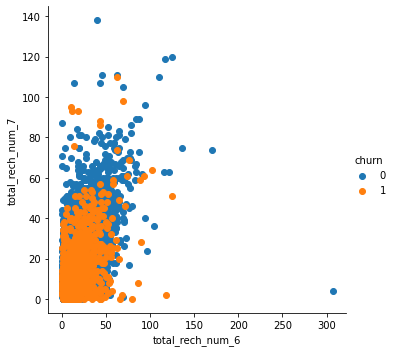

In [223]:
sns.FacetGrid(data,hue='churn',size=5).map(plt.scatter,"total_rech_num_6","total_rech_num_7").add_legend()

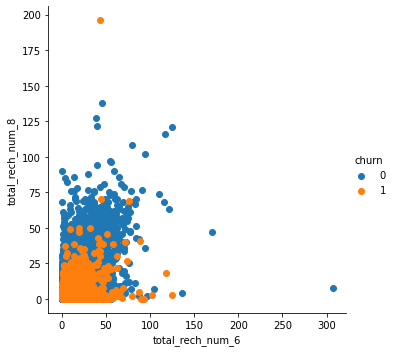

In [224]:
sns.FacetGrid(data,hue='churn',size=5).map(plt.scatter,"total_rech_num_6","total_rech_num_8").add_legend()

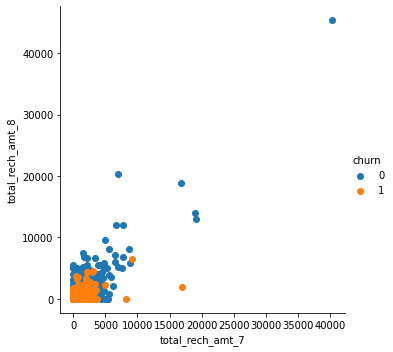

In [225]:
sns.FacetGrid(data,hue='churn',size=5).map(plt.scatter,"total_rech_amt_7","total_rech_amt_8").add_legend()

In [226]:
# Create correlation matrix
corr_matrix = raw_data.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.80
high_corr_features = [column for column in upper.columns if any(upper[column] > 0.80)]

print("Features with high correlation in Data:{}\n\n{}".format(len(high_corr_features), high_corr_features))

Features with high correlation in Data:67

['arpu_9', 'onnet_mou_9', 'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2t_mou_9', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2m_mou_9', 'std_og_mou_9', 'isd_og_mou_7', 'isd_og_mou_8', 'isd_og_mou_9', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'total_og_mou_9', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'loc_ic_mou_9', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'std_ic_mou_9', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_ic_mou_9', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_amt_9', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9', 'arpu_3g_6', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'ar

For now we are not dropping these, we will use feature reduction techniques like PCA later to take care of it

# Missing Data Impute- 

In [227]:
# data.info(verbose=True)
#from fancyimpute import KNN, NuclearNormMinimization, SoftImpute, BiScaler, IterativeImputer, MICE
#from fancyimpute import IterativeImputer, MICE
# from fancyimpute import IterativeImputer
# data_cols = data.columns
# ii = IterativeImputer()
# data_miss_clean = pd.DataFrame(ii.fit_transform(data))
# data_miss_clean.columns = data_cols

In [228]:
#KNN took a lot of time(20 mins) and it has dependency on Tensorflow so not using it anymore, although tried and it worked on Google Collab

# %%time
# from fancyimpute import KNN
# data_cols = data.columns
# data_miss_clean = pd.DataFrame(KNN(k=3).fit_transform(data))
# data_miss_clean.columns = data_cols

Using Sklearn KNN Imputer to impute the feature variables

In [229]:
%%time
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
data_cols = data.columns
data_filled = pd.DataFrame(imputer.fit_transform(data),columns=data_cols)
data_filled.head()

CPU times: user 1min 35s, sys: 13.9 s, total: 1min 49s
Wall time: 1min 45s


,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,night6_0.0,night6_1.0,night7_1.0,night8_1.0,fb6_0.0,fb6_1.0,fb7_0.0,fb7_1.0,fb8_0.0,fb8_1.0,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,arpu_diff_7,arpu_diff_6,onnet_mou_diff_7,onnet_mou_diff_6,offnet_mou_diff_7,offnet_mou_diff_6,roam_ic_mou_diff_7,roam_ic_mou_diff_6,roam_og_mou_diff_7,roam_og_mou_diff_6,loc_og_mou_diff_7,loc_og_mou_diff_6,std_og_mou_diff_7,std_og_mou_diff_6,isd_og_mou_diff_7,isd_og_mou_diff_6,spl_og_mou_diff_7,spl_og_mou_diff_6,total_og_mou_diff_7,total_og_mou_diff_6,loc_ic_mou_diff_7,loc_ic_mou_diff_6,std_ic_mou_diff_7,std_ic_mou_diff_6,isd_ic_mou_diff_7,isd_ic_mou_diff_6,spl_ic_mou_diff_7,spl_ic_mou_diff_6,total_ic_mou_diff_7,total_ic_mou_diff_6,total_rech_num_diff_7,total_rech_num_diff_6,total_rech_amt_diff_7,total_rech_amt_diff_6,max_rech_amt_diff_7,max_rech_amt_diff_6,total_rech_data_diff_7,total_rech_data_diff_6,av_rech_amt_data_diff_7,av_rech_amt_data_diff_6,vol_2g_mb_diff_7,vol_2g_mb_diff_6,vol_3g_mb_diff_7,vol_3g_mb_diff_6,churn
0,197.385,214.816,213.803,15.905,5.195,0.00,96.53,51.41,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.39,4.62,0.00,19.67,20.74,0.00,0.115,16.155,0.00,0.475,0.165,0.00,27.18,41.525,0.00,8.515,0.575,0.00,75.565,14.155,0.00,0.00,0.00,0.00,84.08,14.73,0.00,0.0,0.00,0.00,1.17,0.345,0.00,0.0,0.0,0.0,0.00,0.00,0.00,17.25,10.58,0.16,29.545,55.40,4.13,7.17,2.615,1.15,53.975,68.605,5.44,0.04,1.28,0.00,10.455,17.85,0.00,0.35,3.44,0.00,10.845,22.575,0.00,0.00,0.00,5.44,0.10,0.0,0.0,4.64,5.15,0.00,7.07,9.365,0.00,4.0,3.0,2.0,362.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,968.0,30.40,0.00,101.20,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,252.0,252.0,252.0,-1.013,16.418,16.80,6.09,-13.53,-58.65,0.00,0.00,0.00,0.00,-27.885,-13.54,31.40,-37.95,0.00,0.00,0.615,-0.21,0.00,0.00,5.515,20.145,-16.475,-4.745,-5.15,-4.64,0.115,0.015,5.44,5.44,-1.0,-2.0,0.0,-110.0,0.0,0.0,0.0,0.0,0.0,0.0,4.43,-24.38,-41.15,26.04,1.0
1,1069.180,1349.850,3171.480,57.840,54.680,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51

# Outlier Treatment

We will use Mu+-3sigma (Z score) technique to cap and floor the outlier, we wont remove these records

In [230]:
def outlier_capping(array, k=3):
    ulimit = array.mean() + k*array.std()
    llimit = array.mean() - k*array.std()
    array[array<llimit] = llimit
    array[array>ulimit] = ulimit
    return array

In [231]:
## Alternative Method for outlier treatment
# for col in data1.columns:
#     percentiles = data1[col].quantile([0.01,0.99]).values
#     data1[col][data1[col] <= percentiles[0]] = percentiles[0]
#     data1[col][data1[col] >= percentiles[1]] = percentiles[1]

In [232]:
ind_vars =  ['night6_0.0', 'night6_1.0', 'night7_1.0', 'night8_1.0', 'fb6_0.0', 'fb6_1.0', 'fb7_0.0', 'fb7_1.0', 'fb8_0.0', 'fb8_1.0', 'churn']

num_vars = [x for x in data_filled.columns if x not in ind_vars]


In [233]:
data_filled [num_vars] = data_filled[num_vars].apply(outlier_capping, axis=0)

In [234]:
data_filled.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,night6_0.0,night6_1.0,night7_1.0,night8_1.0,fb6_0.0,fb6_1.0,fb7_0.0,fb7_1.0,fb8_0.0,fb8_1.0,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,arpu_diff_7,arpu_diff_6,onnet_mou_diff_7,onnet_mou_diff_6,offnet_mou_diff_7,offnet_mou_diff_6,roam_ic_mou_diff_7,roam_ic_mou_diff_6,roam_og_mou_diff_7,roam_og_mou_diff_6,loc_og_mou_diff_7,loc_og_mou_diff_6,std_og_mou_diff_7,std_og_mou_diff_6,isd_og_mou_diff_7,isd_og_mou_diff_6,spl_og_mou_diff_7,spl_og_mou_diff_6,total_og_mou_diff_7,total_og_mou_diff_6,loc_ic_mou_diff_7,loc_ic_mou_diff_6,std_ic_mou_diff_7,std_ic_mou_diff_6,isd_ic_mou_diff_7,isd_ic_mou_diff_6,spl_ic_mou_diff_7,spl_ic_mou_diff_6,total_ic_mou_diff_7,total_ic_mou_diff_6,total_rech_num_diff_7,total_rech_num_diff_6,total_rech_amt_diff_7,total_rech_amt_diff_6,max_rech_amt_diff_7,max_rech_amt_diff_6,total_rech_data_diff_7,total_rech_data_diff_6,av_rech_amt_data_diff_7,av_rech_amt_data_diff_6,vol_2g_mb_diff_7,vol_2g_mb_diff_6,vol_3g_mb_diff_7,vol_3g_mb_diff_6,churn
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.00000

## Scaling the data

StandardScaler : It transforms the data in such a manner that it has mean as 0 and standard deviation as 1. In short, it standardizes the data. Standardization is useful for data which has negative values. It arranges the data in a standard normal distribution. It is more useful in classification than regression.

Ideally we should do the standars scaling before doing any modeling excercise so we same rule is applied across the whole dataset. If we do it after train, test split then it might affect the model results and we also need to take care of the production code and in production code we should apply the same scaling logic which we use here.

The text in this paragraph is almost an exact copy of what was written earlier. PCA is effected by scale so you need to scale the features in the data before applying PCA. You can transform the data onto unit scale (mean = 0 and variance = 1) which is a requirement for the optimal performance of many machine learning algorithms. StandardScaler helps standardize the dataset’s features. Note you fit on the training set and transform on the training and test set. If you want to see the negative effect not scaling your data can have, scikit-learn has a section on the effects of not standardizing your data.


In [235]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = data_filled.drop("churn", axis = 1)
cols=X.columns
X_scaled = pd.DataFrame(scaler.fit_transform(X),columns=cols)
X_scaled.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,night6_0.0,night6_1.0,night7_1.0,night8_1.0,fb6_0.0,fb6_1.0,fb7_0.0,fb7_1.0,fb8_0.0,fb8_1.0,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,arpu_diff_7,arpu_diff_6,onnet_mou_diff_7,onnet_mou_diff_6,offnet_mou_diff_7,offnet_mou_diff_6,roam_ic_mou_diff_7,roam_ic_mou_diff_6,roam_og_mou_diff_7,roam_og_mou_diff_6,loc_og_mou_diff_7,loc_og_mou_diff_6,std_og_mou_diff_7,std_og_mou_diff_6,isd_og_mou_diff_7,isd_og_mou_diff_6,spl_og_mou_diff_7,spl_og_mou_diff_6,total_og_mou_diff_7,total_og_mou_diff_6,loc_ic_mou_diff_7,loc_ic_mou_diff_6,std_ic_mou_diff_7,std_ic_mou_diff_6,isd_ic_mou_diff_7,isd_ic_mou_diff_6,spl_ic_mou_diff_7,spl_ic_mou_diff_6,total_ic_mou_diff_7,total_ic_mou_diff_6,total_rech_num_diff_7,total_rech_num_diff_6,total_rech_amt_diff_7,total_rech_amt_diff_6,max_rech_amt_diff_7,max_rech_amt_diff_6,total_rech_data_diff_7,total_rech_data_diff_6,av_rech_amt_data_diff_7,av_rech_amt_data_diff_6,vol_2g_mb_diff_7,vol_2g_mb_diff_6,vol_3g_mb_diff_7,vol_3g_mb_diff_6
count,3.000100e+04,3.000100e+04,3.000100e+04,3.000100e+04,3.000100e+04,3.000100e+04,3.000100e+04,3.000100e+04,3.000100e+04,3.000100e+04,3.000100e+04,3.000100e+04,3.000100e+04,3.000100e+04,3.000100e+04,3.000100e+04,3.000100e+04,3.000100e+04,3.000100e+04,3.000100e+04,3.000100e+04,3.000100e+04,3.000100e+04,3.000100e+04,3.000100e+04,3.000100e+04,3.000100e+04,3.000100e+04,3.000100e+04,3.000100e+04,3.000100e+04,3.000100e+04,3.000100e+04,3.000100e+04,3.000100e+04,3.000100e+04,3.000100e+04,3.000100e+04,3.000100e+04,3.000100e+04,3.000100e+04,3.000100e+04,3.000100e+04,3.000100e+04,3.000100e+04,3.000100e+04,3.000100e+04,3.000100e+04,3.000100e+04,3.000100e+04,3.000100e+04,3.000100e+04,3.000100e+04,3.000100e+04,3.000100e+04,3.000100e+04,3.000100e+04,3.000100e+04,3.000100e+04,3.000100e+04,3.000100e+04,3.000100e+04,3.000100e+04,3.000100e+04,3.000100e+04,3.000100e+04,3.000100e+04,3.000100e+04,3.000100e+04,3.000100e+04,3.000100e+04,3.000100e+04,3.000100e+04,3.000100e+04,3.000100e+04,3.000100e+04,3.000100e+04,3.000100e+04,3.000100e+04,3.000100e+04,3.000100e+04,3.000100e+04,3.000100e+04,3.000100e+04,3.000100e+04,3.000100e+04,3.00

as we can see above now mean is 0 and sigma is 1 for all variables.

# Modeling

Lets first look at the event rate

In [236]:
100*data_filled.churn.value_counts(normalize=True)

0.0    91.863605
1.0     8.136395
Name: churn, dtype: float64

So we have an event rate of 8.13%. We also need to check it after split in train and test

In [237]:
# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion

## Divide data into train and test

In [238]:
# divide data into train and test
y = data_filled.churn
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.30, random_state = 0, stratify = y)

print('X_train shape is '+str(X_train.shape))
print('y_train shape is '+str(y_train.shape))
print('X_test shape is '+str(X_test.shape))
print('y_test shape is '+str(y_test.shape))

X_train shape is (21000, 187)
y_train shape is (21000,)
X_test shape is (9001, 187)
y_test shape is (9001,)


In [239]:
100*y_train.sum()/y_train.shape[0]

8.138095238095238

## SMOTE technique for imbalanced data

In [240]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

print("Number records X_train dataset: ", X_train.shape)
print("Number records y_train dataset: ", y_train.shape)
print("Number records X_test dataset: ", X_test.shape)
print("Number records y_test dataset: ", y_test.shape)

Number records X_train dataset:  (21000, 187)
Number records y_train dataset:  (21000,)
Number records X_test dataset:  (9001, 187)
Number records y_test dataset:  (9001,)


In [241]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 1709
Before OverSampling, counts of label '0': 19291 

After OverSampling, the shape of train_X: (38582, 187)
After OverSampling, the shape of train_y: (38582,) 

After OverSampling, counts of label '1': 19291
After OverSampling, counts of label '0': 19291


# Logistic regression without PCA

In [242]:
X_train_res.shape

(38582, 187)

In [243]:
# Create correlation matrix
corr_matrix = X_train_res.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.80
high_corr_features = [column for column in upper.columns if any(upper[column] > 0.80)]

print("Features with high correlation in Data:{}\n\n{}".format(len(high_corr_features), high_corr_features))

Features with high correlation in Data:44

['roam_og_mou_6', 'roam_og_mou_7', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'fb6_1.0', 'total_rech_data_amt_6', 'total_rech_data_amt_7', 'total_rech_data_amt_8', 'total_og_mou_diff_7', 'total_og_mou_diff_6', 'total_ic_mou_diff_7', 'total_ic_mou_diff_6', 'total_rech_amt_diff_7', 'total_rech_amt_diff_6']


In [244]:
column_drop = X_train_res[high_corr_features]

X_train_res_no_corr = X_train_res.drop(column_drop, axis=1)
X_train_res_no_corr.shape

(38582, 143)

In [245]:
import statsmodels.api as sm

# # Logistic regression model
# logm1 = sm.GLM(y_train_res,(sm.add_constant(X_train_res_no_corr)), family = sm.families.Binomial())
# logm1.fit().summary()

### Feature Selection Using RFE

In [246]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train_res_no_corr, y_train_res)

list(zip(X_train_res_no_corr.columns, rfe.support_, rfe.ranking_))

col = X_train_res_no_corr.columns[rfe.support_]

X_train_res_no_corr.columns[~rfe.support_]

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'total_rech_num_diff_7', 'total_rech_num_diff_6', 'max_rech_amt_diff_7',
       'max_rech_amt_diff_6', 'total_rech_data_diff_7',
       'total_rech_data_diff_6', 'av_rech_amt_data_diff_7', 'vol_2g_mb_diff_6',
       'vol_3g_mb_diff_7', 'vol_3g_mb_diff_6'],
      dtype='object', length=128)

In [247]:
X_train_sm = sm.add_constant(X_train_res_no_corr[col])
logm2 = sm.GLM(y_train_res,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                38582
Model:                            GLM   Df Residuals:                    38566
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15942.
Date:                Mon, 13 Apr 2020   Deviance:                       31884.
Time:                        15:16:34   Pearson chi2:                 1.01e+05
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -1.7617      0.027    -64.392      0.000      -1.815      -1.708
loc_og_t2m_mou_7           -0.7737      0.032    -23.978      0.000      -0.837      -0.710
og_others_8                -0.5283      0.177     -2.976      0.003      -0.876      -0.180
loc_ic_t2t_mou_8           -0.7878      0.037    -21.061      0.000      -0.861      -0.715
loc_ic_t2m_mou_6           -0.4791      0.032    -14.943      0.000      -0.542      -0.416
total_rech_num_8           -0.7366      0.020    -37.088      0.000      -0.776      -0.698
last_day_rch_amt_8         -0.5728      0.019    -29.647      0.000      -0.611      -0.535
av_rech_amt_data_6          0.9682      0.107      9.084      0.000       0.759       1.177
av_rech_amt_data_8         -1.1388      0.120     -9.454      0.000      -1.375      -0.903
vol_2g_mb_7                -0.4312      0.033    -12.977      0.000      -0.496      -0.366
vbc_3g_8                   -0.4104      0.029    -14.147      0.000      -0.467      -0.354
fb8_1.0                    -0.5160      0.027    -19.007      0.000      -0.569      -0.463
loc_og_mou_diff_7          -0.7554      0.028    -27.220      0.000      -0.810      -0.701
loc_ic_mou_diff_6          -0.6284      0.030    -20.732      0.000      -0.688      -0.569
av_rech_amt_data_diff_6     0.7934      0.101      7.893      0.000       0.596       0.990
vol_2g_mb_diff_7           -0.4426      0.032    -13.862      0.000      -0.505      -0.380
===========================================================================================
"""

In [248]:
# X_test[col].shape
#res = modres.predict(X_test[col])

In [249]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred.shape

(38582,)

In [250]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.28633347, 0.07127189, 0.69060368, 0.5361865 , 0.10985169,
       0.3720576 , 0.42247347, 0.12030288, 0.30328194, 0.31312449])

Creating a dataframe with the actual churn flag and the predicted probabilities

In [251]:
print(y_train_res.shape)
y_train_pred.shape

(38582,)


(38582,)

In [252]:
y_train_pred_final = pd.DataFrame({'Churn':y_train_res, 'Churn_Prob':y_train_pred})
y_train_pred_final.head()

,Churn,Churn_Prob
0,0.0,0.286333
1,0.0,0.071272
2,0.0,0.690604
3,0.0,0.536186
4,0.0,0.109852


In [253]:
##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [254]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
0,0.0,0.286333,0
1,0.0,0.071272,0
2,0.0,0.690604,1
3,0.0,0.536186,1
4,0.0,0.109852,0


In [255]:
from sklearn import metrics

In [256]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[15326  3965]
 [ 2969 16322]]


In [257]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8202788865273962


Checking VIF 

In [258]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [259]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_res_no_corr[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_res_no_corr[col].values, i) for i in range(X_train_res_no_corr[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,av_rech_amt_data_8,27.58
6,av_rech_amt_data_6,26.74
13,av_rech_amt_data_diff_6,25.17
10,fb8_1.0,2.99
3,loc_ic_t2m_mou_6,2.25
0,loc_og_t2m_mou_7,2.05
8,vol_2g_mb_7,1.94
12,loc_ic_mou_diff_6,1.91
14,vol_2g_mb_diff_7,1.74
9,vbc_3g_8,1.61


In [260]:
# Let's drop TotalCharges since it has a high VIF
col = col.drop(['loc_ic_t2m_mou_6','loc_og_t2m_mou_7'])
col

Index(['og_others_8', 'loc_ic_t2t_mou_8', 'total_rech_num_8',
       'last_day_rch_amt_8', 'av_rech_amt_data_6', 'av_rech_amt_data_8',
       'vol_2g_mb_7', 'vbc_3g_8', 'fb8_1.0', 'loc_og_mou_diff_7',
       'loc_ic_mou_diff_6', 'av_rech_amt_data_diff_6', 'vol_2g_mb_diff_7'],
      dtype='object')

In [261]:
# Let's re-run the model using the selected variables
X_train_res_no_corr_sm = sm.add_constant(X_train_res_no_corr[col])
logm4 = sm.GLM(y_train_res,X_train_res_no_corr_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                38582
Model:                            GLM   Df Residuals:                    38568
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16837.
Date:                Mon, 13 Apr 2020   Deviance:                       33673.
Time:                        15:16:35   Pearson chi2:                 1.86e+05
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -1.5487      0.026    -60.471      0.000      -1.599      -1.499
og_others_8                -0.6226      0.184     -3.387      0.001      -0.983      -0.262
loc_ic_t2t_mou_8           -1.3997      0.039    -36.204      0.000      -1.475      -1.324
total_rech_num_8           -0.8083      0.020    -40.832      0.000      -0.847      -0.770
last_day_rch_amt_8         -0.6937      0.019    -36.306      0.000      -0.731      -0.656
av_rech_amt_data_6          1.0131      0.104      9.696      0.000       0.808       1.218
av_rech_amt_data_8         -1.1468      0.118     -9.697      0.000      -1.379      -0.915
vol_2g_mb_7                -0.4115      0.033    -12.554      0.000      -0.476      -0.347
vbc_3g_8                   -0.4598      0.029    -15.751      0.000      -0.517      -0.403
fb8_1.0                    -0.5140      0.026    -19.413      0.000      -0.566      -0.462
loc_og_mou_diff_7          -0.2917      0.019    -15.387      0.000      -0.329      -0.255
loc_ic_mou_diff_6          -0.3408      0.020    -17.390      0.000      -0.379      -0.302
av_rech_amt_data_diff_6     0.8255      0.099      8.365      0.000       0.632       1.019
vol_2g_mb_diff_7           -0.4398      0.031    -13.964      0.000      -0.502      -0.378
===========================================================================================
"""

In [262]:
y_train_pred = res.predict(X_train_res_no_corr_sm).values.reshape(-1)

In [263]:
y_train_pred[:10]

array([0.24199555, 0.04162151, 0.60921883, 0.54100752, 0.0773857 ,
       0.32828053, 0.38081528, 0.13344371, 0.27846883, 0.67138118])

In [264]:
y_train_pred_final['Churn_Prob'] = y_train_pred

In [265]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
0,0.0,0.241996,0
1,0.0,0.041622,0
2,0.0,0.609219,1
3,0.0,0.541008,1
4,0.0,0.077386,0


In [266]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8091078741381992


In [267]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
confusion

array([[15162,  4129],
       [ 3236, 16055]])

### Metrics beyond simply accuracy

In [268]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [269]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8322533824063034

In [270]:
# Let us calculate specificity
TN / float(TN+FP)

0.7859623658700948

In [271]:
print( 'Logistic Regression without PCA for traininn data- Classification Report: ')
print (metrics.classification_report(y_train_pred_final.Churn, y_train_pred_final.predicted))

# check area under curve
print("AUC:    \t", round(roc_auc_score(y_train_pred_final.Churn, y_train_pred_final.predicted),3))
print ('Accuracy Score :',metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted) )

Logistic Regression without PCA for traininn data- Classification Report: 
              precision    recall  f1-score   support

         0.0       0.82      0.79      0.80     19291
         1.0       0.80      0.83      0.81     19291

    accuracy                           0.81     38582
   macro avg       0.81      0.81      0.81     38582
weighted avg       0.81      0.81      0.81     38582

AUC:    	 0.809
Accuracy Score : 0.8091078741381992


### Plotting the ROC Curve

An ROC curve demonstrates several things:

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [272]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [273]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

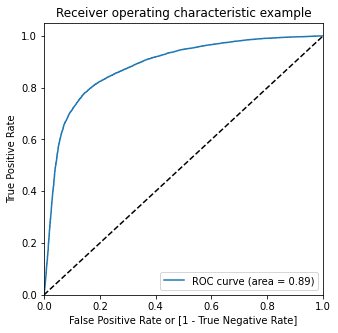

In [274]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

making predictions on test set

In [275]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression(C=1e9)
#logsk.fit(X_train[col], y_train)
logsk.fit(X_test, y_test)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [276]:
# Predicted probabilities
y_pred = logsk.predict_proba(X_test)
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]
# Let's see the head
y_pred_1.head()

,1
0,0.030990
1,0.384034
2,0.012959
3,0.991655
4,0.720850


In [277]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn
23504,0.0
20890,1.0
19385,0.0
20215,1.0
20589,0.0


In [278]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_Prob'})

y_pred_final.head()

,churn,CustID,Churn_Prob
0,0.0,23504,0.030990
1,1.0,20890,0.384034
2,0.0,19385,0.012959
3,1.0,20215,0.991655
4,0.0,20589,0.720850


In [279]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_pred_final.head()

,churn,CustID,Churn_Prob,predicted
0,0.0,23504,0.030990,0
1,1.0,20890,0.384034,0
2,0.0,19385,0.012959,0
3,1.0,20215,0.991655,1
4,0.0,20589,0.720850,1


## Model Evaluation

In [280]:
from sklearn import metrics

In [281]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.churn, y_pred_final.predicted )
confusion

array([[8168,  101],
       [ 419,  313]])

In [282]:
#Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.churn, y_pred_final.predicted)

0.942228641262082

In [283]:
#draw_roc(y_pred_final.Churn, y_pred_final.predicted)
"{:2.2f}".format(metrics.roc_auc_score(y_pred_final.churn, y_pred_final.Churn_Prob))

'0.91'

In [284]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [285]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.4275956284153005

In [286]:
# Let us calculate specificity
TN / float(TN+FP)

0.9877857056475995

In [287]:
print( 'Logistic Regression without PCA for Test data- Classification Report: : ')
print (metrics.classification_report(y_pred_final.churn, y_pred_final.predicted))

# check area under curve
print("AUC:    \t", round(roc_auc_score(y_pred_final.churn, y_pred_final.predicted),3))
print ('Accuracy Score :',metrics.accuracy_score(y_pred_final.churn, y_pred_final.predicted) )

Logistic Regression without PCA for Test data- Classification Report: : 
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      8269
         1.0       0.76      0.43      0.55       732

    accuracy                           0.94      9001
   macro avg       0.85      0.71      0.76      9001
weighted avg       0.94      0.94      0.93      9001

AUC:    	 0.708
Accuracy Score : 0.942228641262082


## PCA(principal component analysis) - application

In [288]:
from sklearn.decomposition import PCA
pca = PCA(random_state=42)
# pca = pca.fit_transform(X_train_res)
pca.fit(X_train_res)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

<BarContainer object of 187 artists>

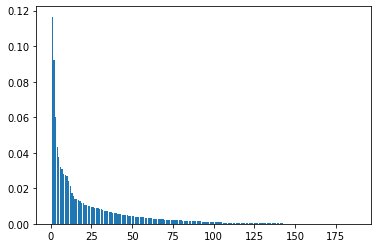

In [289]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

In [290]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0       11.66
1       20.88
2       26.88
3       31.19
4       34.96
5       38.13
6       41.21
7       44.00
8       46.76
9       49.42
10      51.84
11      54.00
12      55.75
13      57.31
14      58.74
15      60.15
16      61.49
17      62.79
18      63.97
19      65.15
20      66.23
21      67.27
22      68.28
23      69.28
24      70.25
25      71.19
26      72.11
27      73.02
28      73.92
29      74.77
30      75.61
31      76.39
32      77.13
33      77.86
34      78.56
35      79.21
36      79.85
37      80.47
38      81.06
39      81.64
40      82.21
41      82.75
42      83.29
43      83.80
44      84.31
45      84.80
46      85.28
47      85.74
48      86.19
49      86.61
50      87.03
51      87.43
52      87.83
53      88.21
54      88.59
55      88.95
56      89.31
57      89.66
58      90.00
59      90.33
60      90.64
61      90.95
62      91.24
63      91.53
64      91.80
65      92.07
66      92.32
67      92.57
68      92.81
69      93.04
70      93.26
71    

### Making the scree plot


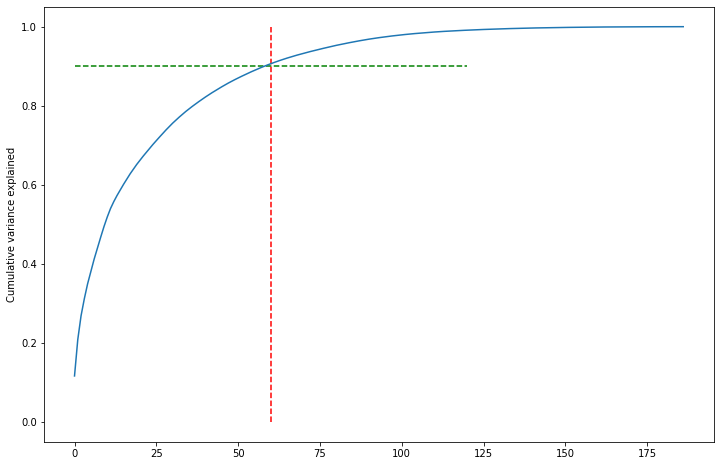

In [291]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=60, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=.90, xmax=120, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

So we will cosider 60 components

In [292]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=60)
X_train_pca = pca_final.fit_transform(X_train_res)
X_train_pca.shape

(38582, 60)

In [293]:
corrmat = np.corrcoef(X_train_pca.transpose())
corrmat.shape

(60, 60)

1. ### Plotting the heatmap of the corr matrix for PCA

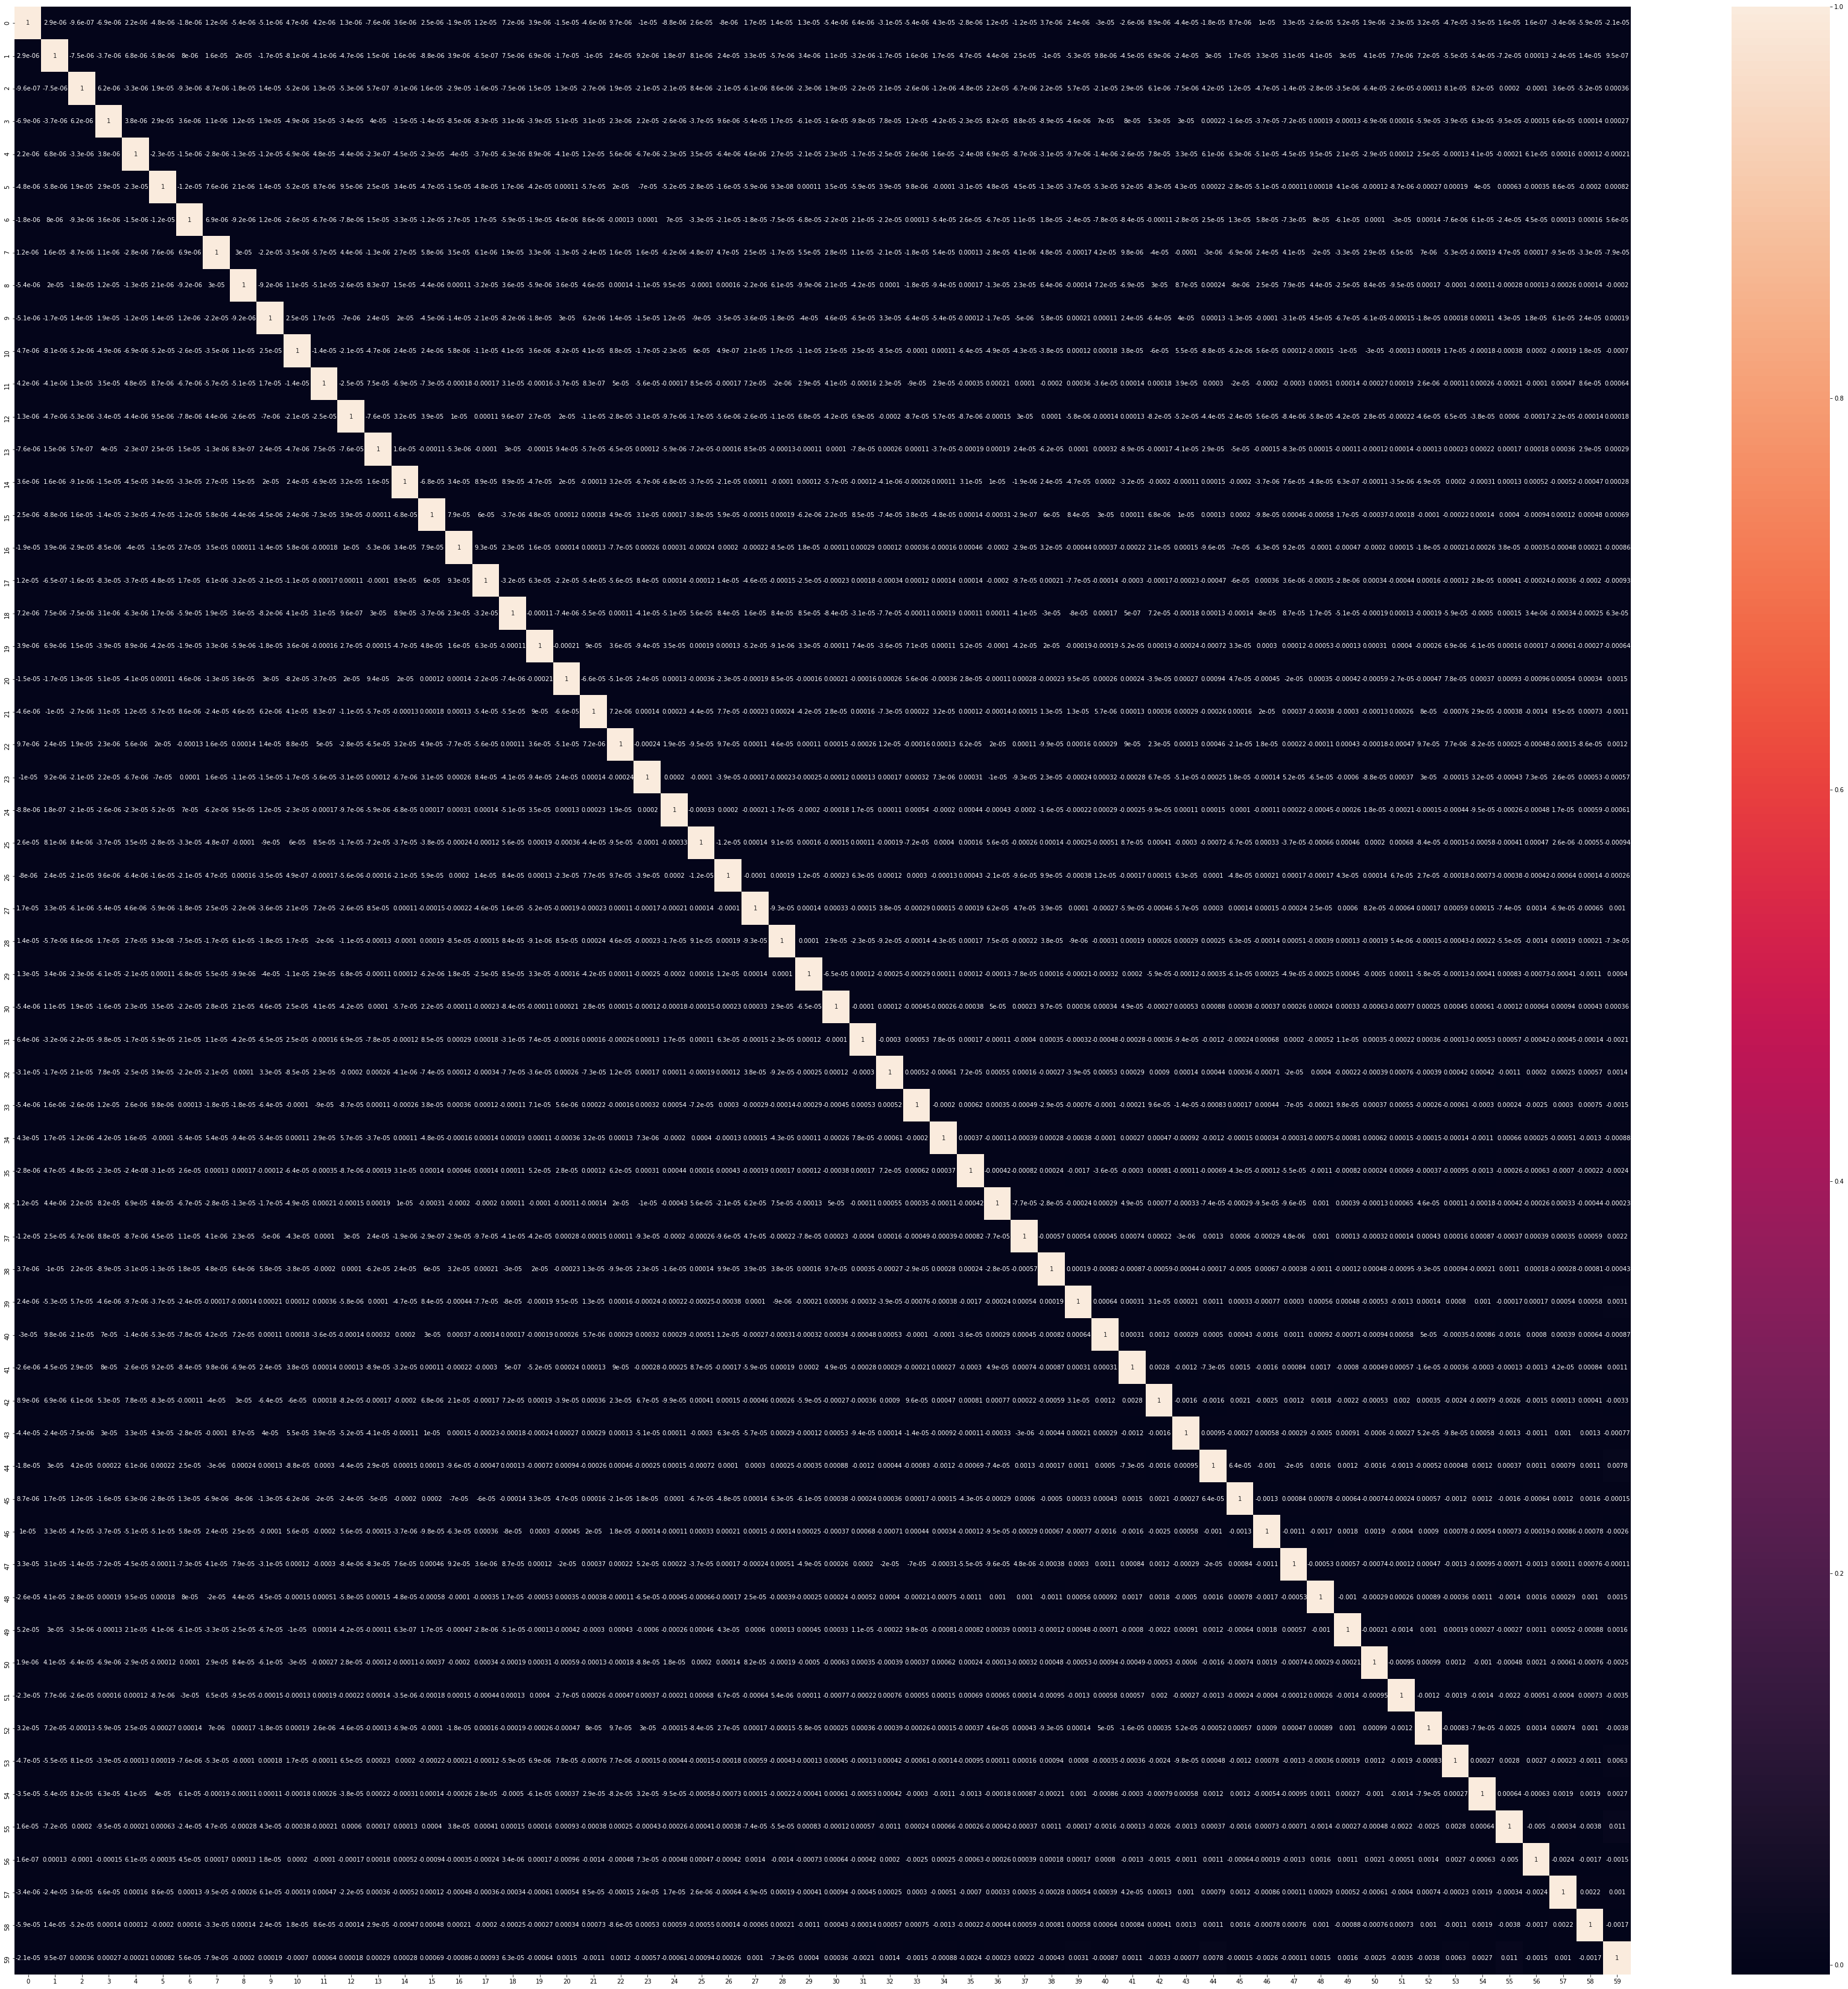

In [294]:
plt.figure(figsize=[60,60])
sns.heatmap(corrmat, annot=True)

### Applying the PCA transformation on the test set

In [295]:
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(9001, 60)

##  XGBoost

In [296]:
from xgboost import XGBClassifier

# fit model no training data

model = XGBClassifier()

model.fit(X_train_pca, y_train_res)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [297]:
# make predictions for test data

y_pred = model.predict(X_test_pca)

predictions = [round(value) for value in y_pred]

# Importing classification report and confusion matrix from sklearn metrics

from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

# Printing confusion matrix

print(confusion_matrix(y_test, y_pred))

# Printing accuracy matrix

print(accuracy_score(y_test, y_pred))


# Let's check the report of our default model

print(classification_report(y_test,y_pred))

[[7665  604]
 [ 298  434]]
0.899788912343073
              precision    recall  f1-score   support

         0.0       0.96      0.93      0.94      8269
         1.0       0.42      0.59      0.49       732

    accuracy                           0.90      9001
   macro avg       0.69      0.76      0.72      9001
weighted avg       0.92      0.90      0.91      9001



In [298]:
# It takes lot of time to run so commenting now. Results are given in next cell
# from sklearn.model_selection import GridSearchCV

# import xgboost as xgb

# import time

# start_time = time.time()

# yes 

# parameters = {'n_estimators': [10, 100, 500], 'max_depth':[12, 24, 36, 28, 60]}

# clf = GridSearchCV(gbdt, parameters, cv= 3, scoring='roc_auc',return_train_score=True)

# clf.fit(X_train_pca, y_train_res)

# train_auc= clf.cv_results_['mean_train_score']

# train_auc_std= clf.cv_results_['std_train_score']

# cv_auc = clf.cv_results_['mean_test_score']

# cv_auc_std= clf.cv_results_['std_test_score']

# print("Execution time: " + str((time.time() - start_time)) + ' ms')

In [300]:
# clf.best_params_

# {'max_depth': 12, 'n_estimators': 500}

In [301]:
gbdt=xgb.XGBClassifier(max_depth=12,n_estimators=500, n_jobs=-1,class_weight='balanced',random_state=42)

gbdt.fit(X_train_pca, y_train_res)


# Making predictions
predictions_xgb = gbdt.predict(X_test_pca)

print( 'XGB with PCA for test data ')

# create onfusion matrix
cm = confusion_matrix(y_test, predictions_xgb)

print ('Confusion Matrix: ')
print(cm) 

print( 'Classification Report : ')
print (metrics.classification_report(y_test, predictions_xgb))

# check area under curve
metrics.roc_auc_score(y_test, predictions_xgb)
print("AUC:    \t", round(roc_auc_score(y_test, predictions_xgb),2))

XGB with PCA for test data 
Confusion Matrix: 
[[7836  433]
 [ 355  377]]
Classification Report : 
              precision    recall  f1-score   support

         0.0       0.96      0.95      0.95      8269
         1.0       0.47      0.52      0.49       732

    accuracy                           0.91      9001
   macro avg       0.71      0.73      0.72      9001
weighted avg       0.92      0.91      0.91      9001

AUC:    	 0.73


### Applying logistic regression on the data of our Principal components

In [302]:
from sklearn.linear_model import LogisticRegression
LR_PCA = LogisticRegression(class_weight='balanced')
model_LR_PCA = LR_PCA.fit(X_train_pca, y_train_res)
pred_probs_train = model_LR_PCA.predict_proba(X_train_pca)

In [303]:
# check score on train data
model_LR_PCA.score(X_train_pca, y_train_res)

0.8456534135088901

In [304]:
import sklearn.metrics as metrics
"{:2.2}".format(metrics.roc_auc_score(y_train_res, pred_probs_train[:,1]))

'0.91'

**Making predictions on the test set**

In [305]:
print( 'Logistic Regression with PCA for train data- Classification Report: ')
print (metrics.classification_report(y_pred_final.churn, y_pred_final.predicted))

# check area under curve
print("AUC:    \t", round(roc_auc_score(y_pred_final.churn, y_pred_final.predicted),3))
print ('Accuracy Score :',metrics.accuracy_score(y_pred_final.churn, y_pred_final.predicted) )

Logistic Regression with PCA for train data- Classification Report: 
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      8269
         1.0       0.76      0.43      0.55       732

    accuracy                           0.94      9001
   macro avg       0.85      0.71      0.76      9001
weighted avg       0.94      0.94      0.93      9001

AUC:    	 0.708
Accuracy Score : 0.942228641262082


In [306]:
# predict on test
y_pred = model_LR_PCA.predict(X_test_pca)
from sklearn.metrics import confusion_matrix
# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)

print( 'Logistic Regression with PCA for test data ')

print ('Confusion Matrix: ')
print(cm) 

print( 'Classification Report : ')
print (metrics.classification_report(y_test, y_pred))

# check area under curve
Predictions  = model_LR_PCA.predict(X_test_pca)
metrics.roc_auc_score(y_test, Predictions)
print("AUC:    \t", round(roc_auc_score(y_test, Predictions),2))

Logistic Regression with PCA for test data 
Confusion Matrix: 
[[6800 1469]
 [ 141  591]]
Classification Report : 
              precision    recall  f1-score   support

         0.0       0.98      0.82      0.89      8269
         1.0       0.29      0.81      0.42       732

    accuracy                           0.82      9001
   macro avg       0.63      0.81      0.66      9001
weighted avg       0.92      0.82      0.86      9001

AUC:    	 0.81


# Random Forest on the data on our Principal components

In [307]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier(random_state = 42)

# fit
rfc.fit(X_train_pca, y_train_res)

# Making predictions
predictions_rf = rfc.predict(X_test_pca)

In [308]:
print( 'Random Forest with PCA for test data ')

# create onfusion matrix
cm = confusion_matrix(y_test, predictions_rf)

print ('Confusion Matrix: ')
print(cm) 

print( 'Classification Report : ')
print (metrics.classification_report(y_test, predictions_rf))

# check area under curve
metrics.roc_auc_score(y_test, predictions_rf)
print("AUC:    \t", round(roc_auc_score(y_test, predictions_rf),2))

Random Forest with PCA for test data 
Confusion Matrix: 
[[7828  441]
 [ 381  351]]
Classification Report : 
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95      8269
         1.0       0.44      0.48      0.46       732

    accuracy                           0.91      9001
   macro avg       0.70      0.71      0.71      9001
weighted avg       0.91      0.91      0.91      9001

AUC:    	 0.71


### HyperParameter Tune for RF

In [309]:
# Create first pipeline for base without reducing features.

pipe = Pipeline([('classifier' , RandomForestClassifier())])

# Create param grid.

param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['liblinear']},
    {'classifier' : [RandomForestClassifier()],
    'classifier__n_estimators' : list(range(10,101,10)),
    'classifier__max_features' : list(range(5,32,5))}
]

# Create grid search object

clf = GridSearchCV(pipe, param_grid = param_grid, cv = 2, verbose=True, n_jobs=-1)

# Fit on data

best_clf = clf.fit(X_train_pca, y_train_res)
best_clf.best_params_

Fitting 2 folds for each of 100 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 15.6min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed: 18.7min finished


{'classifier': RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features=5,
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=80,
                        n_jobs=None, oob_score=False, random_state=None,
                        verbose=0, warm_start=False),
 'classifier__max_features': 5,
 'classifier__n_estimators': 80}

In [310]:
# model_RF_PCA=RandomForestClassifier(random_state=42, max_features=10, n_estimators= 40, max_depth=100, criterion='gini')
#{'criterion': 'gini', 'max_depth': 100, 'max_features': 5, 'n_estimators': 20}
model_RF_PCA=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=100, max_features=10,
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=40,
                        n_jobs=None, oob_score=False, random_state=42,
                        verbose=0, warm_start=False)
model_RF_PCA.fit(X_train_pca, y_train_res)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=100, max_features=10,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [311]:
# Making predictions
predictions_rf1 = model_RF_PCA.predict(X_test_pca)

In [312]:
print( 'Random Forest with PCA for test data after hyperparamater tuning ')

# create onfusion matrix
cm1 = confusion_matrix(y_test, predictions_rf1)

print ('Confusion Matrix: ')
print(cm1) 

print( 'Classification Report : ')
print (metrics.classification_report(y_test, predictions_rf1))

# check area under curve
metrics.roc_auc_score(y_test, predictions_rf1)
print("AUC:    \t", round(roc_auc_score(y_test, predictions_rf1),2))

Random Forest with PCA for test data after hyperparamater tuning 
Confusion Matrix: 
[[7813  456]
 [ 369  363]]
Classification Report : 
              precision    recall  f1-score   support

         0.0       0.95      0.94      0.95      8269
         1.0       0.44      0.50      0.47       732

    accuracy                           0.91      9001
   macro avg       0.70      0.72      0.71      9001
weighted avg       0.91      0.91      0.91      9001

AUC:    	 0.72


In [313]:
print("Results of RF wit PCA") 
# predict on test
y_pred = model_RF_PCA.predict(X_test_pca)
from sklearn.metrics import confusion_matrix
# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
Predictions  = model_RF_PCA.predict(X_test_pca)
metrics.roc_auc_score(y_test, Predictions)
print("AUC:    \t", round(roc_auc_score(y_test, Predictions),2))

Results of RF wit PCA
[[7813  456]
 [ 369  363]]
Sensitivity: 	0.5
Specificity: 	0.94
AUC:    	 0.72


# Model without PCA - Lasso and Random Forest

In [314]:
### Feature reduction using LASSO
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
 
lsvc = LinearSVC(C=0.001, penalty="l1", dual=False).fit(X_train_res, y_train_res)
model = SelectFromModel(lsvc, prefit=True)
X_lasso = model.transform(X_train_res)
pos = model.get_support(indices=True)
 ### Feature reduction using RFE
print(X_lasso.shape)

(38582, 58)


In [315]:
#feature vector for decision tree#feature 
lasso_features = list(data_filled.columns[pos])
print("Features identified by LASSO for model buidling using L1 penalty: ", lasso_features)

Features identified by LASSO for model buidling using L1 penalty:  ['roam_ic_mou_7', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_6', 'loc_og_mou_8', 'std_og_t2f_mou_8', 'isd_og_mou_6', 'isd_og_mou_8', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'total_og_mou_8', 'total_ic_mou_8', 'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_8', 'total_rech_num_8', 'total_rech_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8', 'total_rech_data_8', 'av_rech_amt_data_8', 'vol_2g_mb_8', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'monthly_3g_6', 'sachet_3g_7', 'aon', 'vbc_3g_8', 'night6_1.0', 'fb6_0.0', 'fb7_0.0', 'fb8_0.0', 'fb8_1.0', 'arpu_diff_7', 'onnet_mou_diff_6', 'roam_ic_mou_diff_7', 'loc_og_mou_diff_7', 'total_og_mou_diff_7', 'total_og_mou_diff_6', 'loc_ic_mou_diff_7', 'total_ic_mou_diff_7', 'total_ic_mou_diff_6', 'total_rech_num_diff_7', 'total_rech_num_diff_6', 'total_rech_amt_diff_6', 'max_rech_amt_diff_7', 'max_rech_amt_diff_

In [316]:
# Running the random forest with default parameters.
#max_features = int(round(np.sqrt(X_lasso.shape[1])))    # number of variables to consider to split each node
#print(max_features)

#rfc = RandomForestClassifier(n_estimators=100, max_features='auto', class_weight={0:0.1, 1: 0.9}, oob_score=True, random_state=4, verbose=1)
rfc = RandomForestClassifier(random_state=4)
# fit
rfc.fit(X_lasso, y_train_res)

# Making predictions
X_test_lasso = pd.DataFrame(data=X_test).iloc[:, pos]

predictions = rfc.predict(X_test_lasso)

In [317]:
print(classification_report(y_test,predictions))

# Printing confusion matrix
print(confusion_matrix(y_test, predictions))

print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96      8269
         1.0       0.56      0.66      0.60       732

    accuracy                           0.93      9001
   macro avg       0.76      0.80      0.78      9001
weighted avg       0.94      0.93      0.93      9001

[[7886  383]
 [ 252  480]]
0.9294522830796578


In [318]:
rf_feature_importance_active = rfc.feature_importances_

std = np.std([rfc.feature_importances_ for tree in rfc.estimators_],
             axis=0)
indices = np.argsort(rf_feature_importance_active)[::-1][:15]

# Print the feature ranking
print("Feature ranking:")

for f in range(15):
    print("%d. %s(%f)" % (f + 1,lasso_features[f] ,rf_feature_importance_active[indices[f]]))

Feature ranking:
1. roam_ic_mou_7(0.115427)
2. roam_og_mou_7(0.086878)
3. roam_og_mou_8(0.062547)
4. loc_og_t2m_mou_8(0.054006)
5. loc_og_t2f_mou_7(0.046669)
6. loc_og_t2c_mou_6(0.039779)
7. loc_og_mou_8(0.038892)
8. std_og_t2f_mou_8(0.033946)
9. isd_og_mou_6(0.031226)
10. isd_og_mou_8(0.027201)
11. spl_og_mou_7(0.026686)
12. spl_og_mou_8(0.025655)
13. og_others_6(0.024671)
14. total_og_mou_8(0.023352)
15. total_ic_mou_8(0.021379)


### Recommendations and insights:

Random forest performs good with the given dataset. Looking at feature importance we can see following feature which are most important:

- **roam_ic** : This shows the roaming calls that are only incoming to the customer. Most of the time when people travel, they need to use the telecom operator which provides best offers for calls that are at roaming. Since most of the operator incur very low or nill charges, people tend to use those operators more.

- **roam_og** : This corresponds to the roaming outgoing calls. Since every operator charges most for the outgoing roaming calls, our telecom opearator can make an edge and provide attractive offers on this segment.

- **loc_og** : This corresponds to local outgoing calls and local calls could play a big difference if our telecom operater is charging high.

- **No data variable** : Customers are not concerned about the data charges so these can be kept at the same rates.

Hence, to stop people frpm churn, the telecom operator have to think in terms of roaming charges and how it can be handled, the local/std outgoing charges and how those can be optimized, and also can think in a way to help customers who travel a lot and has to use roaming calling services a lot.